# Task 1 — Single Layer Perceptron (from scratch)
## Objective: Train a perceptron to classify points based on a linear boundary using Python from first principles.
### a.	Setup Python Environment
### b.	Define Perceptron Function
### c.	Generate Synthetic Training Data
### d.	Train with Perceptron Learning Rule
### e.	Visualize Decision Boundary


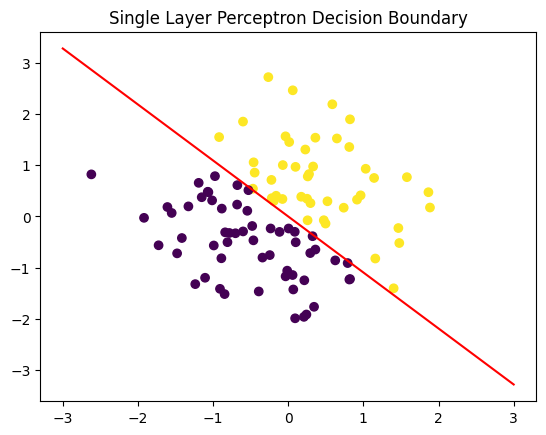

In [1]:
# Setup Environment
import numpy as np
import matplotlib.pyplot as plt

#Define Perceptron Function
class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=100):
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for _ in range(self.epochs):
            for i in range(len(X)):
                linear_output = np.dot(X[i], self.weights) + self.bias
                prediction = 1 if linear_output >= 0 else 0
                error = y[i] - prediction

                # Update rule
                self.weights += self.lr * error * X[i]
                self.bias += self.lr * error

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, 0)

#Generate Synthetic Training Data
np.random.seed(42)

X_linear = np.random.randn(100, 2)
y_linear = np.where(X_linear[:, 0] + X_linear[:, 1] > 0, 1, 0)

#Train with Perceptron Learning Rule
perceptron = Perceptron(learning_rate=0.1, epochs=50)
perceptron.fit(X_linear, y_linear)

#Visualize Decision Boundary
plt.scatter(X_linear[:, 0], X_linear[:, 1], c=y_linear)

x_values = np.linspace(-3, 3, 100)
y_values = -(perceptron.weights[0] * x_values + perceptron.bias) / perceptron.weights[1]

plt.plot(x_values, y_values, color='red')
plt.title("Single Layer Perceptron Decision Boundary")
plt.show()

# Task 2 — Multi-Layer Perceptron (MLP)
## Objective: Build an MLP classifier using NumPy (from scratch) to learn non-linear decision boundaries.

## (For context: an MLP adds “hidden layers” and trains using backpropagation.)

### a.	Define Network Architecture
### For simplicity:
### •	Input layer: 2 neurons
 
### •	Hidden layer: 4 neurons (ReLU activation)
### •	Output layer: 1 neuron (sigmoid)
### b.	Define Activation Functions
### c.	Initialize Weights & Biases
### d.	Train with Backpropagation
### e.	Evaluate the Model


MLP XOR Predictions:
[[0.]
 [1.]
 [1.]
 [0.]]


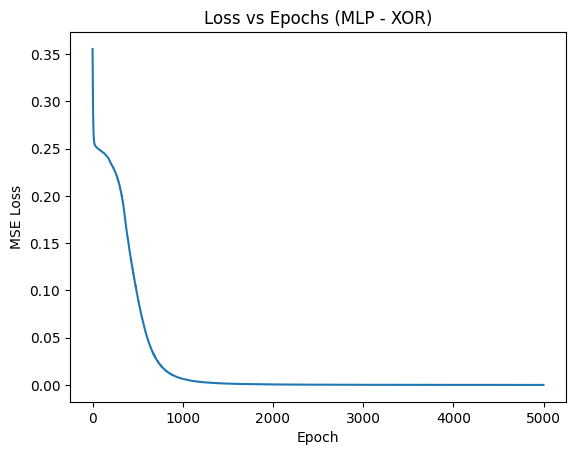

In [5]:
# Activation Functions
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

#Initialize Weights
np.random.seed(42)

W1 = np.random.randn(2, 4) 
b1 = np.zeros((1, 4))

W2 = np.random.randn(4, 1) 
b2 = np.zeros((1, 1))

#XOR Dataset
X = np.array([[0,0],
            [0,1],
            [1,0],
            [1,1]])

y = np.array([[0],
            [1],
            [1],
            [0]])

#Training using Backpropagation
lr = 0.1
epochs = 5000 
losses = []

for epoch in range(epochs):

# ---- Forward Pass ---- 
        Z1 = np.dot(X, W1) + b1 
        A1 = relu(Z1)

        Z2 = np.dot(A1, W2) + b2 
        A2 = sigmoid(Z2)

# ---- Compute Loss (MSE) ---- 
        loss = np.mean((y - A2) ** 2) 
        losses.append(loss)

# ---- Backward Pass ----
        m = X.shape[0]

        dZ2 = A2 - y
        dW2 = np.dot(A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        dA1 = np.dot(dZ2, W2.T)
        dZ1 = dA1 * relu_derivative(Z1) 
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

# ---- Update Weights ----
        W2 -= lr * dW2 
        b2 -= lr * db2 
        W1 -= lr * dW1 
        b1 -= lr * db1

#Evaluate MLP
# Final Forward Pass
Z1 = np.dot(X, W1) + b1 
A1 = relu(Z1)
Z2 = np.dot(A1, W2) + b2 
A2 = sigmoid(Z2)

print("MLP XOR Predictions:") 
print(np.round(A2))

plt.plot(losses)
plt.title("Loss vs Epochs (MLP - XOR)") 
plt.xlabel("Epoch")
plt.ylabel("MSE Loss") 
plt.show()


# Task 3 — Perform following tasks:
## 1.	Compare single layer vs MLP on linearly separable vs non- linear data (e.g., XOR).
## 2.	Explore how hidden layer size impacts learning.
## 3.	Plot loss over training epochs.

## 1)
## Test on Linearly Separable Data


In [6]:
# Generate Linear Data
np.random.seed(0)
X_linear = np.random.randn(200, 2)
y_linear = np.where(X_linear[:, 0] + X_linear[:, 1] > 0, 1, 0)

# Train Perceptron
perceptron = Perceptron(learning_rate=0.1, epochs=50) 
perceptron.fit(X_linear, y_linear)

# Accuracy Function
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred) * 100

# Evaluate
y_pred_linear = perceptron.predict(X_linear) 
print("Perceptron Accuracy on Linear Data:",
    accuracy(y_linear, y_pred_linear), "%")



Perceptron Accuracy on Linear Data: 100.0 %


## Test Perceptron on XOR

In [7]:
X_xor = np.array([[0,0],
                [0,1],
                [1,0],
                [1,1]])

y_xor = np.array([0,1,1,0]) 
perceptron.fit(X_xor, y_xor)
print("Perceptron Accuracy on XOR:",
        accuracy(y_xor, perceptron.predict(X_xor)), "%")

Perceptron Accuracy on XOR: 50.0 %


## MLP on XOR

In [9]:
def train_mlp(X, y, hidden_neurons=4, epochs=5000, lr=0.1): 
    np.random.seed(42)
    W1 = np.random.randn(2, hidden_neurons) 
    b1 = np.zeros((1, hidden_neurons))

    W2 = np.random.randn(hidden_neurons, 1) 
    b2 = np.zeros((1, 1))

    losses = []

    for epoch in range(epochs):

# Forward
        Z1 = np.dot(X, W1) + b1 
        A1 = relu(Z1)

        Z2 = np.dot(A1, W2) + b2 
        A2 = sigmoid(Z2)

        loss = np.mean((y - A2) ** 2) 
        losses.append(loss)

# Backward
        m = X.shape[0] 
        dZ2 = A2 - y
        dW2 = np.dot(A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        dA1 = np.dot(dZ2, W2.T)
        dZ1 = dA1 * relu_derivative(Z1) 
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        W2 -= lr * dW2 
        b2 -= lr * db2 
        W1 -= lr * dW1 
        b1 -= lr * db1

# Final Prediction
        Z1 = np.dot(X, W1) + b1 
        A1 = relu(Z1)
        Z2 = np.dot(A1, W2) + b2 
        A2 = sigmoid(Z2)

        predictions = np.round(A2)

        return predictions, losses

y_xor_reshaped = y_xor.reshape(-1,1)

pred_mlp, losses = train_mlp(X_xor, y_xor_reshaped) 
print("MLP Accuracy on XOR:",
        accuracy(y_xor, pred_mlp.flatten()), "%")


MLP Accuracy on XOR: 25.0 %


## 2)
## Hidden Layer Size Impact


In [11]:
hidden_sizes = [1, 2, 4, 8]

for size in hidden_sizes:
    pred, _ = train_mlp(X_xor, y_xor_reshaped,
        hidden_neurons=size, 
        epochs=5000,
        lr=0.1)

    acc = accuracy(y_xor, pred.flatten())
    print(f"Hidden Neurons = {size}, Accuracy = {acc}%")


Hidden Neurons = 1, Accuracy = 50.0%
Hidden Neurons = 2, Accuracy = 25.0%
Hidden Neurons = 4, Accuracy = 25.0%
Hidden Neurons = 8, Accuracy = 50.0%


## 3)
## Plot Loss Over Epochs


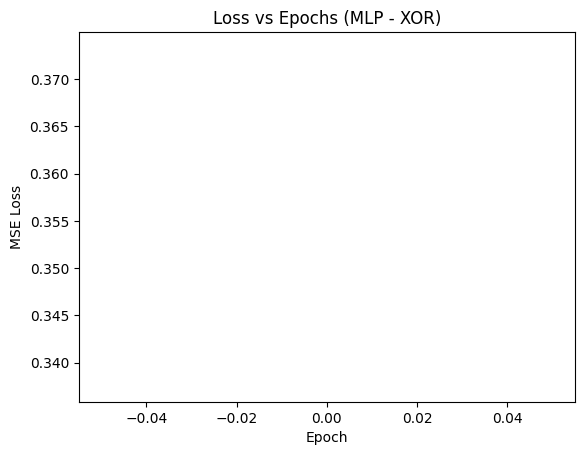

In [13]:
plt.plot(losses)
plt.title("Loss vs Epochs (MLP - XOR)")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.show()

In [1]:
pwd

'/Users/nisargbhavsar/Untitled Folder 2'